In [695]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import regression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [696]:
df1=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df2=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df3=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [697]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [698]:
df1.shape

(1460, 81)

In [699]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [700]:
df2.shape

(1459, 80)

In [701]:
df3.shape

(1459, 2)

In [702]:
df2=pd.concat((df2,df3.iloc[:,-1]),axis=1)

In [703]:
df1.shape

(1460, 81)

In [704]:
df2.shape

(1459, 81)

In [705]:
temp=pd.concat((df1,df2),axis=0)

In [706]:
temp.shape

(2919, 81)

## Missing Values

In [707]:
for i in temp.columns:
    print(i,temp[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 4
LotFrontage 486
LotArea 0
Street 0
Alley 2721
LotShape 0
LandContour 0
Utilities 2
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 2
BsmtHalfBath 2
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 1
TotRmsAbvGrd 0
Functional 2
Fireplaces 0
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 2909
Fence 2348
MiscFeature 2814
MiscVal 0
MoSold

In [708]:
temp.drop(['Id','Alley','FireplaceQu','Fence','MiscFeature','PoolQC'] ,axis=1,inplace=True)

In [709]:
for i in temp.select_dtypes('object').columns :
    m=temp[i].mode()[0]
    temp[i].replace({np.nan : m},inplace=True)

In [710]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [711]:
for i in temp.select_dtypes('float64').columns :
    m=temp[i].median()
    temp[i].replace({np.nan : m},inplace=True)

In [712]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [713]:
df=temp.copy()

In [714]:
df.shape

(2919, 75)

In [715]:
for i in df.columns:
    if 'Yr' in i or 'Year' in i and i!='YearBuilt':
        df[i]=df[i]-df['YearBuilt']

In [716]:
df.drop(['YearBuilt'],axis=1,inplace=True)

In [717]:
for i in df.columns:
    if 'Yr' in i or 'Year' in i:
        print(df[i])

0        0
1        0
2        1
3       55
4        0
        ..
1454     0
1455     0
1456    36
1457     0
1458     1
Name: YearRemodAdd, Length: 2919, dtype: int64
0        0.0
1        0.0
2        0.0
3       83.0
4        0.0
        ... 
1454     9.0
1455     0.0
1456     0.0
1457   -13.0
1458     0.0
Name: GarageYrBlt, Length: 2919, dtype: float64
0        5
1       31
2        7
3       91
4        8
        ..
1454    36
1455    36
1456    46
1457    14
1458    13
Name: YrSold, Length: 2919, dtype: int64


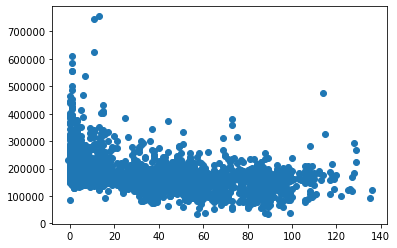

In [718]:
plt.scatter(df['YrSold'],df['SalePrice'])

### I don't know why heatmap is not working since the docker environment updated?

In [719]:
a=df.select_dtypes('object').columns

In [720]:
a

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [721]:
alldum=pd.DataFrame()

In [722]:
for i in a:
    dum=pd.get_dummies(df[i],drop_first=True)
    alldum=pd.concat([alldum,dum],axis=1)
    df=df.drop(i,axis=1)

In [723]:
df=pd.concat([alldum,df],axis=1)

In [724]:
df.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,5,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,31,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,7,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,91,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,8,250000.0


In [725]:
df =df.loc[:,~df.columns.duplicated()]

In [726]:
df.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,5,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,31,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,7,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,91,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,8,250000.0


In [727]:
df.describe()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.047619,0.008907,0.777321,0.157588,0.995889,0.026036,0.005481,0.636862,0.041110,0.020555,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,36.479959,180052.854647
std,0.212995,0.093973,0.416116,0.364417,0.063996,0.159271,0.073845,0.480987,0.198579,0.141913,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,30.336182,57381.565721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,34900.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,154795.084126
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,35.000000,176734.841494
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,54.500000,191895.744157
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,136.000000,755000.000000


## Outliers Handling

In [728]:
import seaborn as sns

In [729]:
count=0
for i in df.select_dtypes('int64').columns:
    count+=1
print("Integer64 Type count :",count)

Integer64 Type count : 24


### since we have encoded and removed object data

In [730]:
count=0
for i in df.select_dtypes('object').columns:
    count+=1
print("Object Type count :",count)

Object Type count : 0


In [731]:
count=0
for i in df.select_dtypes('float64').columns:
    count+=1
print("Float Type count :",count)

Float Type count : 12


In [732]:
for i in df.select_dtypes('int64').columns:
    low=df[i].quantile(.5)
    high=df[i].quantile(.95)
    for j in df[i]:
        if j<low :
            df[i].replace({j:low},inplace=True)
        elif j>high :
            df[i].replace({j:high},inplace=True)

In [733]:
for i in df.select_dtypes('float64').columns:
    low=df[i].quantile(.5)
    high=df[i].quantile(.95)
    for j in df[i]:
        if j<low :
            df[i].replace({j:low},inplace=True)
        elif j>high :
            df[i].replace({j:high},inplace=True)

## Dependent, independent variables

In [734]:
X_train=df.iloc[:1459,:-1]
y_train=df.iloc[:1459,-1]
X_test=df.iloc[1460:,:-1]
y_test=df.iloc[1460:,-1]

In [735]:
y_test.shape

(1459,)

# **XGBRegressor**

In [736]:
regressor=xgb.XGBRegressor()

In [737]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500, 1900]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.03,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5,6,7]
base_score=[0.15,0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [738]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [739]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          verbosity=None),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.15, 0.25, 0.5, 0.75,
            

In [740]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [763]:
regressor=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [764]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [765]:
y_pred=regressor.predict(X_test)

In [766]:
from sklearn.metrics import mean_squared_error as mse

In [767]:
np.sqrt(mse(np.log(y_test),np.log(y_pred)))

0.16222570541105102

In [768]:
y_pred.shape

(1459,)

In [769]:
np.sqrt(mse(y_test,y_pred))

35567.19697920632

In [770]:
np.mean(np.array(y_pred))

198308.94

## creating submission.csv to upload

In [781]:
sub=pd.DataFrame({'Id': df3.iloc[:,0] , 'SalePrice' : y_pred})

In [784]:
sub.head()

,Id,SalePrice
0,1461,178522.515625
1,1462,178953.281250
2,1463,185969.750000
3,1464,182143.718750
4,1465,193601.046875


In [790]:
df3.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [786]:
sub.to_csv('Submission.csv',index=False)

# **RFRegressor**

In [749]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1500, random_state = 0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500, n_jobs=-1, random_state=0)

In [750]:
y_pred=rf.predict(X_test)

In [751]:
y_pred.mean()

198637.6438069185

In [752]:
mse(y_pred,y_test)

1238863700.5954413

In [753]:
np.sqrt(mse(y_test,y_pred))

35197.49565800728

## using lasso model as we have large no of features

In [754]:
from sklearn.linear_model import Lasso

In [755]:
ls=Lasso()

In [756]:
parameters={'alpha' :[1e-15,1e-10,1e-5,1e-4,1e-3,1e-2,.1,1,2,3,5,10,20,50,100,150,200,300,450]}

In [757]:
lreg=GridSearchCV(ls,parameters,scoring='neg_mean_squared_error',cv=5)

In [758]:
lreg.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349588353203.0954, tolerance: 124511166.4397049
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382535139966.08655, tolerance: 136592007.78293937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394792253362.24475, tolerance: 170786131.8129934
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404660182

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204639611211.85098, tolerance: 170786131.8129934
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338624883905.24774, tolerance: 198555923.11446998
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292282770933.182, tolerance: 198762973.59012383
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666402077

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 2, 3, 5, 10, 20, 50, 100, 150, 200,
                                   300, 450]},
             scoring='neg_mean_squared_error')

In [759]:
print(lreg.best_params_)
print(lreg.best_score_)

{'alpha': 450}
-712159102.3529495


In [760]:
ls=Lasso(alpha=450)

In [761]:
ls.fit(X,y)

Lasso(alpha=450)

In [762]:
y_pred=ls.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 170 is different from 175)

In [ ]:
mse(y_test,y_pred)

In [ ]:
np.sqrt(mse(y_test,y_pred))

In [ ]:
np.mean(y_test)